## Imports

In [95]:
import cv2
import os
import numpy as np
from matplotlib import pyplot as plt

## Settings

In [96]:
imdir = '/home/drevital/obstacles_classification_datasets/rgb_6/train/no_obstacle'
imname = '9_663_.05_2021-08-17--14-48-25_.jpg'
threshold = 60

# Read image & separate it to <ref, current>

In [97]:
imrgb = cv2.imread(os.path.join(imdir, imname))
im = cv2.cvtColor(imrgb, cv2.COLOR_BGR2RGB)        
w = im.shape[1]
ref = im[:, :w//2]
current = im[:, w//2:]

## Generate diff & mask images

In [98]:
diff = cv2.absdiff(current, ref)
agg_rgb = np.stack((diff[:, :, 0], diff[:, :, 1], diff[:, :, 2])).max(0)
_, mask = cv2.threshold(agg_rgb, threshold, 255, cv2.THRESH_BINARY)
mask = cv2.cvtColor(mask, cv2.COLOR_GRAY2BGR)        

## Concatenate <ref, current, mask> for training

In [99]:
concat = cv2.hconcat([ref, current, mask])

## Display concatenated image

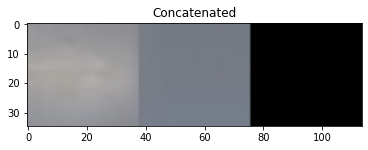

In [100]:
plt.imshow(concat)
plt.title('Concatenated')
plt.show()